# 计算机视觉纳米学位项目

## 实战项目：图像标注

---

Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO)  数据集是用于场景理解的一个大型数据集。 该数据集通常用于训练并对目标检测进行基准测试、分割和标注生成算法。

![Sample Dog Output](images/coco-examples.jpg)

你可以在 [该网站](http://cocodataset.org/#home) 或在 [该研究论文](https://arxiv.org/pdf/1405.0312.pdf)中查阅有关该数据集的更多信息。

在这个 notebook 中，你将要对此数据集进行研究，从而为该实战项目做准备。

## Step 1: 初始化 COCO API

首先，我们要把将用于获取数据的 [COCO API](https://github.com/cocodataset/cocoapi) 初始化。

In [2]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = 'E:\训练数据包\生成图像说明\cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=7.46s)
creating index...
index created!
loading annotations into memory...
Done (t=1.00s)
creating index...
index created!


## Step 2: 绘制样本图像

接下来，我们要从数据集中随机选择一张图像，并为其绘图，以及五个相应的标注。 每次运行下面的代码单元格时，都会选择不同的图像。

在这个项目中，你将使用这个数据集来训练你自己的模型，使其生成图像标注！

http://images.cocodataset.org/val2014/COCO_val2014_000000319933.jpg


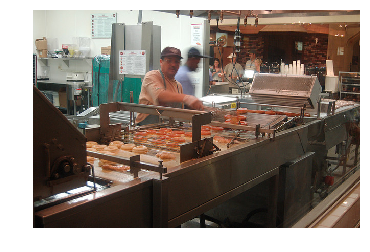

A cook is seen in a open kitchen making donuts
A man making doughnuts on a large mechanical assembly line.
Workers busy making donuts in a commercial bakery
A man works with a machine that is producing donuts. 
A baker puts donuts on a cookie sheet.


In [3]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

## Step 3: 接下来的任务！

在这个项目中，你要使用图像标注对数据集来训练CNN-RNN模型，从而使其自动由标注生成图像。 在接下来的一个 notebook  (**1_Preliminaries-zh.ipynb**) 中，你将了解更多关于如何设计这种架构的内容。

![Image Captioning CNN-RNN model](images/encoder-decoder.png)